### RAG workflow generally consists of 3 steps:

1. **Generating search queries** for finding relevant documents. What does the model recommend looking up before answering this question?
2. **Fetching relevant documents** from an external data source using the generated search queries. Performing a search to find some relevant information.
3. **Generating a response** with inline citations using the fetched documents. Using the acquired knowledge to produce an educated answer.

    3.1. Using Given Document
    
    3.2. Using Web Search

#### Rerank

In [23]:
def complex_handler(obj):
    if hasattr(obj, '__dict__'):
        return obj.__dict__
    else:
        raise TypeError(f'Object of type {type(obj).__name__} is not JSON serializable')

In [2]:
import cohere
co = cohere.Client(api_key="")

In [24]:
response = co.chat(
  model="command-r-plus",
  message="Who is more popular: Nsync or Backstreet Boys?",
  search_queries_only=True
)
response

NonStreamedChatResponse(text='', generation_id='e7f23357-62af-407f-a4c6-98f40f52d9c8', citations=None, documents=None, is_search_required=True, search_queries=[ChatSearchQuery(text='Nsync vs Backstreet Boys popularity', generation_id='e7f23357-62af-407f-a4c6-98f40f52d9c8')], search_results=None, finish_reason='COMPLETE', tool_calls=None, chat_history=[], prompt=None, meta=ApiMeta(api_version=ApiMetaApiVersion(version='1', is_deprecated=None, is_experimental=None), billed_units=ApiMetaBilledUnits(input_tokens=11, output_tokens=6, search_units=None, classifications=None), tokens=ApiMetaTokens(input_tokens=None, output_tokens=6), warnings=None))

In [26]:
print(json.dumps(response, default=complex_handler, indent=4))

{
    "text": "",
    "generation_id": "e7f23357-62af-407f-a4c6-98f40f52d9c8",
    "citations": null,
    "documents": null,
    "is_search_required": true,
    "search_queries": [
        {
            "text": "Nsync vs Backstreet Boys popularity",
            "generation_id": "e7f23357-62af-407f-a4c6-98f40f52d9c8"
        }
    ],
    "search_results": null,
    "finish_reason": "COMPLETE",
    "tool_calls": null,
    "chat_history": [],
    "prompt": null,
    "meta": {
        "api_version": {
            "version": "1",
            "is_deprecated": null,
            "is_experimental": null
        },
        "billed_units": {
            "input_tokens": 11,
            "output_tokens": 6,
            "search_units": null,
            "classifications": null
        },
        "tokens": {
            "input_tokens": null,
            "output_tokens": 6
        },
        "warnings": null
    }
}


### Step 2+3: Fetching relevant documents and Generating a response

In [27]:
response = co.chat(
  model="command-r-plus",
  message="Who is more popular: Nsync or Backstreet Boys?",
  documents=[
    {
      "title": "CSPC: Backstreet Boys Popularity Analysis - ChartMasters",
      "snippet": "↓ Skip to Main Content\n\nMusic industry – One step closer to being accurate\n\nCSPC: Backstreet Boys Popularity Analysis\n\nHernán Lopez Posted on February 9, 2017 Posted in CSPC 72 Comments Tagged with Backstreet Boys, Boy band\n\nAt one point, Backstreet Boys defined success: massive albums sales across the globe, great singles sales, plenty of chart topping releases, hugely hyped tours and tremendous media coverage.\n\nIt is true that they benefited from extraordinarily good market conditions in all markets. After all, the all-time record year for the music business, as far as revenues in billion dollars are concerned, was actually 1999. That is, back when this five men group was at its peak."
    },
    {
      "title": "CSPC: NSYNC Popularity Analysis - ChartMasters",
      "snippet": "↓ Skip to Main Content\n\nMusic industry – One step closer to being accurate\n\nCSPC: NSYNC Popularity Analysis\n\nMJD Posted on February 9, 2018 Posted in CSPC 27 Comments Tagged with Boy band, N'Sync\n\nAt the turn of the millennium three teen acts were huge in the US, the Backstreet Boys, Britney Spears and NSYNC. The latter is the only one we haven’t study so far. It took 15 years and Adele to break their record of 2,4 million units sold of No Strings Attached in its first week alone.\n\nIt wasn’t a fluke, as the second fastest selling album of the Soundscan era prior 2015, was also theirs since Celebrity debuted with 1,88 million units sold."
    },
    {
      "title": "CSPC: Backstreet Boys Popularity Analysis - ChartMasters",
      "snippet": " 1997, 1998, 2000 and 2001 also rank amongst some of the very best years.\n\nYet the way many music consumers – especially teenagers and young women’s – embraced their output deserves its own chapter. If Jonas Brothers and more recently One Direction reached a great level of popularity during the past decade, the type of success achieved by Backstreet Boys is in a completely different level as they really dominated the business for a few years all over the world, including in some countries that were traditionally hard to penetrate for Western artists.\n\nWe will try to analyze the extent of that hegemony with this new article with final results which will more than surprise many readers."
    },
    {
      "title": "CSPC: NSYNC Popularity Analysis - ChartMasters",
      "snippet": " Was the teen group led by Justin Timberlake really that big? Was it only in the US where they found success? Or were they a global phenomenon?\n\nAs usual, I’ll be using the Commensurate Sales to Popularity Concept in order to relevantly gauge their results. This concept will not only bring you sales information for all NSYNC‘s albums, physical and download singles, as well as audio and video streaming, but it will also determine their true popularity. If you are not yet familiar with the CSPC method, the next page explains it with a short video. I fully recommend watching the video before getting into the sales figures."
    }
  ])
response

NonStreamedChatResponse(text='Both NSYNC and Backstreet Boys were extremely popular at the turn of the millennium. Backstreet Boys had massive album sales across the globe, great singles sales, plenty of chart-topping releases, hyped tours, and tremendous media coverage. NSYNC was also very popular, with their album "No Strings Attached" selling 2.4 million units in its first week. Backstreet Boys, however, had a more international appeal and dominated the music business for a few years all over the world, including in some countries that were traditionally hard to penetrate for Western artists.', generation_id='bbe5a427-e44e-4182-932c-afc6b9a9d95c', citations=[ChatCitation(start=36, end=84, text='extremely popular at the turn of the millennium.', document_ids=['doc_1']), ChatCitation(start=105, end=141, text='massive album sales across the globe', document_ids=['doc_0']), ChatCitation(start=143, end=162, text='great singles sales', document_ids=['doc_0']), ChatCitation(start=164, end=

In [28]:
print(json.dumps(response, default=complex_handler, indent=4))

{
    "text": "Both NSYNC and Backstreet Boys were extremely popular at the turn of the millennium. Backstreet Boys had massive album sales across the globe, great singles sales, plenty of chart-topping releases, hyped tours, and tremendous media coverage. NSYNC was also very popular, with their album \"No Strings Attached\" selling 2.4 million units in its first week. Backstreet Boys, however, had a more international appeal and dominated the music business for a few years all over the world, including in some countries that were traditionally hard to penetrate for Western artists.",
    "generation_id": "bbe5a427-e44e-4182-932c-afc6b9a9d95c",
    "citations": [
        {
            "start": 36,
            "end": 84,
            "text": "extremely popular at the turn of the millennium.",
            "document_ids": [
                "doc_1"
            ]
        },
        {
            "start": 105,
            "end": 141,
            "text": "massive album sales across the globe",

### Step 2+3: Fetching relevant web search output and Generating a response
### Connectors
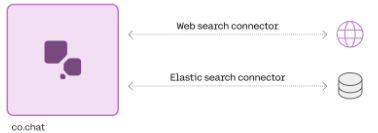

A Caveat on Deploying Connectors: Connector registration only works natively on the Cohere platform. You can, however, register a connector for e.g. Azure or another platform using the Cohere toolkit (more technical detail is available here.) You might also find it useful to read about Cohere deployments on AWS, Azure, and single-container cloud environments.



In [29]:
response = co.chat(
  model="command-r-plus",
  message="Who is more popular: Nsync or Backstreet Boys?",
  connectors=[{"id": "web-search"}])
response

NonStreamedChatResponse(text='*NSync and Backstreet Boys are two of the most successful boy bands of all time. Both groups were active during the late 90s and early 2000s, and their popularity overlapped, leading to comparisons between the two.\n\nBackstreet Boys was formed in 1993 and NSync in 1995. Backstreet Boys had more albums and more songs that charted in the top 10 in the Billboard Hot 100. Backstreet Boys also had more worldwide popularity, especially in Japan. \n\nOn the other hand, NSync had two of the fastest-selling albums of all time, and their three albums were considered pop perfection. NSync also had a surprise reunion in 2013, which caused a media frenzy. Additionally, NSync member Justin Timberlake went on to have a highly successful solo career, becoming a household name.\n\nWhile both groups were extremely popular, it is difficult to say with certainty which was more popular, as this is a matter of personal opinion.', generation_id='db8e1642-844a-4bc7-89af-abefd36f

In [30]:
print(json.dumps(response, default=complex_handler, indent=4))

{
    "text": "*NSync and Backstreet Boys are two of the most successful boy bands of all time. Both groups were active during the late 90s and early 2000s, and their popularity overlapped, leading to comparisons between the two.\n\nBackstreet Boys was formed in 1993 and NSync in 1995. Backstreet Boys had more albums and more songs that charted in the top 10 in the Billboard Hot 100. Backstreet Boys also had more worldwide popularity, especially in Japan. \n\nOn the other hand, NSync had two of the fastest-selling albums of all time, and their three albums were considered pop perfection. NSync also had a surprise reunion in 2013, which caused a media frenzy. Additionally, NSync member Justin Timberlake went on to have a highly successful solo career, becoming a household name.\n\nWhile both groups were extremely popular, it is difficult to say with certainty which was more popular, as this is a matter of personal opinion.",
    "generation_id": "db8e1642-844a-4bc7-89af-abefd36f3735",
 

#### Prompt Truncation

LLMs come with limitations; specifically:

They can only handle so much text as input. This means that you will often need to figure out which document sections and chat history elements to keep, and which ones to omit.

### Rerank

The identifier of the model to use, one of : rerank-english-v3.0, rerank-multilingual-v3.0, rerank-english-v2.0, rerank-multilingual-v2.0

https://api.cohere.com/v1/rerank

We should mention that breaking up long documents into smaller ones first (1-2 paragraphs) will help you not go over the context limit. When trying to stay within the context length limit, you might need to omit some of the documents from the request. 

To make sure that only the least relevant documents are omitted, we recommend using the Rerank endpoint endpoint which will sort the documents by relevancy to the query. The lowest ranked documents are the ones you should consider dropping first.

In [31]:
docs = [
    "Carson City is the capital city of the American state of Nevada.",
    "The Commonwealth of the Northern Mariana Islands is a group of islands in the Pacific Ocean. Its capital is Saipan.",
    "Washington, D.C. (also known as simply Washington or D.C., and officially as the District of Columbia) is the capital of the United States. It is a federal district.",
    "Capital punishment (the death penalty) has existed in the United States since beforethe United States was a country. As of 2017, capital punishment is legal in 30 of the 50 states.",
]

response = co.rerank(
    model="rerank-english-v3.0",
    query="What is the capital of the United States?",
    documents=docs,
    top_n=3,
)
print(response)


id='6a4c8a8f-80e2-45aa-9514-c6d1536374be' results=[RerankResponseResultsItem(document=None, index=2, relevance_score=0.999071), RerankResponseResultsItem(document=None, index=3, relevance_score=0.7867867), RerankResponseResultsItem(document=None, index=0, relevance_score=0.32713068)] meta=ApiMeta(api_version=ApiMetaApiVersion(version='1', is_deprecated=None, is_experimental=None), billed_units=ApiMetaBilledUnits(input_tokens=None, output_tokens=None, search_units=1, classifications=None), tokens=None, warnings=None)


In [32]:
print(json.dumps(response, default=complex_handler, indent=4))

{
    "id": "6a4c8a8f-80e2-45aa-9514-c6d1536374be",
    "results": [
        {
            "document": null,
            "index": 2,
            "relevance_score": 0.999071
        },
        {
            "document": null,
            "index": 3,
            "relevance_score": 0.7867867
        },
        {
            "document": null,
            "index": 0,
            "relevance_score": 0.32713068
        }
    ],
    "meta": {
        "api_version": {
            "version": "1",
            "is_deprecated": null,
            "is_experimental": null
        },
        "billed_units": {
            "input_tokens": null,
            "output_tokens": null,
            "search_units": 1,
            "classifications": null
        },
        "tokens": null,
        "warnings": null
    }
}
